## Generating Example Regression Data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [55]:
n=100
beta_0=5
beta_1=2
np.random.seed(1)
x=10*ss.uniform.rvs(size=n)  ## ss.uniform.rvs(size=n): generate random variables from 0-1 distribution
y=beta_0+beta_1*x+ss.norm.rvs(loc=0,scale=1,size=n) ## loc mean means and scale means s.d.

Text(0, 0.5, 'y')

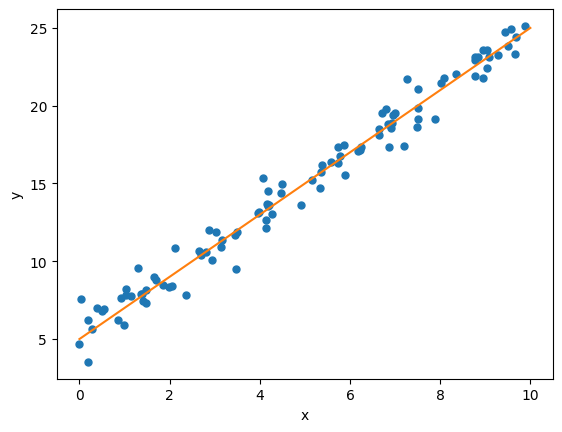

In [56]:
plt.figure()
plt.plot(x,y,"o",ms=5)
xx=np.array([0,10])
plt.plot(xx,beta_0+beta_1*xx)
plt.xlabel("x")
plt.ylabel("y")

In [57]:
(np.mean(x),np.mean(y))

(4.8587792760014565, 14.80142786070299)

## Simple Linear Regression

Y=$\beta_0$+$\beta_1$X+$\varepsilon$, where $\varepsilon$ is the error term. The captial letters always corresponds to the random variables. Once we have used the training data to predict $\hat{\beta_0}$ and $\hat{\beta_1}$, for the model coefficients, we can predict future value of Y.

predicted value:$\hat{y}$=$\hat{\beta_0}$+$\hat{\beta_1}$x. $\hat{y}$ indicates a prediction, or a specific value, of the random variable Y on the basis of the specific value where X is equal to x. The hat of the Beta, they indicate that these are parameter estimates. meaning that their parameter values that have been estimated using data.

$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$. the error: $e_i=y_i-\hat{y}_i$. $RSS=e_{1}^2+e_{2}^2+...+e_{n}^2$

In [9]:
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x


In [10]:
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [11]:
rss

81.540007425512

## Least Squares Estimation in Code

### An additional note on this video:
Note that in this case, the estimated value of the parameter (2.0) coincides with the true value of the parameter. Generally, we do not know the underlying true value, but here it is known to us because we generated the data ourselves. In practical settings, the estimated parameter value may not always match the true value.

In [18]:
rss=[]
slopes=np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y-beta_0-slope*x)**2)) ## asssume we know exactly beta_0
    

In [19]:
rss

[465163.6265980302,
 465086.1430283995,
 465008.6659137614,
 464931.1952541162,
 464853.73104946373,
 464776.273299804,
 464698.82200513716,
 464621.37716546294,
 464543.9387807815,
 464466.5068510928,
 464389.08137639693,
 464311.6623566938,
 464234.2497919835,
 464156.8436822659,
 464079.44402754103,
 464002.05082780897,
 463924.6640830696,
 463847.2837933231,
 463769.9099585693,
 463692.5425788083,
 463615.18165404,
 463537.82718426455,
 463460.47916948184,
 463383.1376096919,
 463305.80250489456,
 463228.4738550901,
 463151.1516602785,
 463073.83592045953,
 462996.5266356335,
 462919.2238058001,
 462841.92743095936,
 462764.6375111115,
 462687.3540462564,
 462610.0770363941,
 462532.80648152455,
 462455.54238164774,
 462378.28473676357,
 462301.0335468723,
 462223.7888119739,
 462146.5505320681,
 462069.31870715506,
 461992.0933372348,
 461914.8744223074,
 461837.66196237254,
 461760.45595743065,
 461683.2564074815,
 461606.06331252505,
 461528.8766725614,
 461451.69648759044,
 461

In [20]:
ind_min=np.argmin(rss)

In [21]:
ind_min

12004

In [22]:
print("Estimate for the slope:", slopes[ind_min])

Estimate for the slope: 2.003999999993347


Text(0, 0.5, 'RSS')

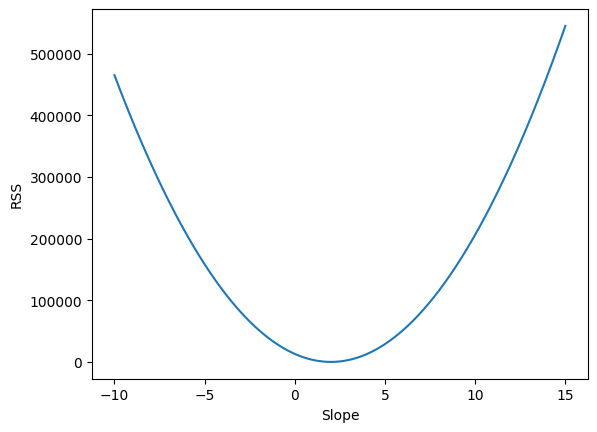

In [23]:
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

## Simple Linear Regression in Code

In [25]:
import statsmodels.api as sm

In [30]:
mod=sm.OLS(y,x)  ##OSL stands for ordinary least square
est=mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):                    1.14e-75
Time:                        16:54:17   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
X=sm.add_constant(x)
mod=sm.OLS(y,X)
est=mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           7.47e-82
Time:                        18:04:14   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

$1.9685\pm1.96\times0.031$, which $1.9685$ is the slope estimate, $0.031$ is the standard error and the total value is the $95$% confidence interval

The Total sum of squares $TSS=\sum_{i=1}^{n}(y_{i}-\overline{y})^{2}$

we expect that RSS is smaller than TSS

The r-squared statistic takes the difference between TSS and RSS,
and then divides that quantity by TSS. ($R^2=\frac{TSS-RSS}{TSS}$)
A number near 0, therefore, indicates that the model did not
explain much of the variability in the response or the outcome.
Larger values are better, but what values of r-squared are considered good always depends on the application context.


## Multiple Linear Regression

The goal is to predict a quantitative or a scalar valued response, Y, on the basis of several predictor variables. 

$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\varepsilon$

In general, consider a predictor Xk and the parameter beta
k associated with that predictor. A unit change the value of xk is associated with a change beta hat k in the value of the outcome y, while keeping all other predictors fixed. If the values of the predictors are correlated, it may not be possible to change the value of one predictor and keep the others fixed. So one therefore always needs to be careful with interpretation of model results.

## scikit-learn for Linear Regression

In [33]:
n=500
beta_0=5
beta_1=2
beta_2=-1
np.random.seed(1)
x_1=10*ss.uniform.rvs(size=n)
x_2=10*ss.uniform.rvs(size=n)
y=beta_0+beta_1*x_1+beta_2*x_2+ss.norm.rvs(loc=0,scale=1,size=n)

In [35]:
X=np.stack([x_1,x_2],axis=1)

In [36]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, '$y$')

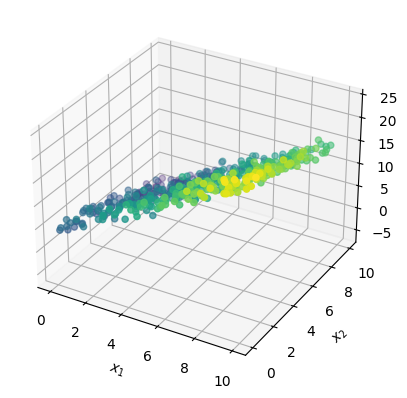

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0],X[:,1],y,c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression()

In [40]:
lm.intercept_

5.154077763777254

In [42]:
lm.coef_[0]

1.9999378989891399

In [43]:
lm.coef_[1]

-1.020264486993336

In [44]:
X_0=np.array([2,4])

In [45]:
lm.predict(X_0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [47]:
lm.score(X,y)

0.9798997316600129

## Assessing Model Accuracy


To evaluate the performance of a regression model, we need to somehow quantify how well the predictions of the model agree with the observed data. In the regression setting, the most commonly used measure is the mean squared error, or MSE.

$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2$

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

In [50]:
lm=LinearRegression(fit_intercept=True)

In [51]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
lm.score(X_test,y_test)

0.9794930834681773

Typically, more flexible models require estimating a greater number of parameters. Models that are too flexible can lead to overfitting, which means that the model starts to follow the noise in the data too closely. In the extreme case, the model can memorize the data points rather learn the structure of the data.
The problem with this is that it generalizes poorly to unseen data.
In contrast, if the model is too simple, it can underfit the data, in which case the model is not sufficiently flexible to learn the structure in the data.